<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Regresión Simple Lineal</center>


#### Acerca de este Lab
Aprenderemos cómo utilizar la librería scikit-learn para implementar regresión lineal simple. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, separaremos nuestros datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos


### Importando paquetes Necesarios

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descargando los Datos
Para descargar los datos, usaremos !wget desde IBM Object Storage.

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-17 19:35:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-02-17 19:35:22 (1.59 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:
Hemos descargado el dataset de consumo de combustible, **`FuelConsumption.csv`**, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Leyendo los datos

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# un vistazo dentro del set de datos
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploración de Datos
Tengamos primero una exploración descriptiva de nuestros datos.

In [4]:
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para explorar más en detalle.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


podemos dibujar cada una de estas características:

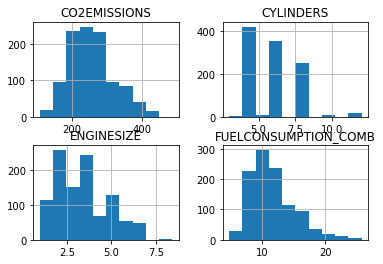

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora, comparemos estas características anteriores con la emisión de carbono, para ver cuán lineal es la regresión:

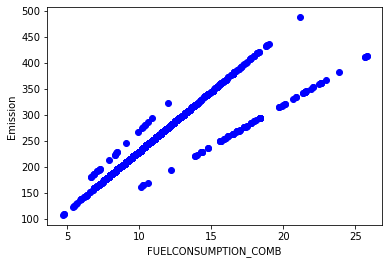

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

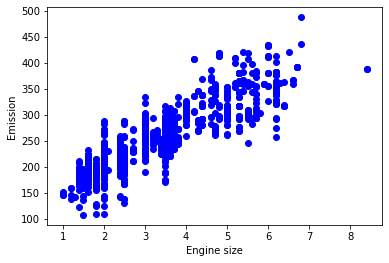

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Práctica
dibuja __CYLINDER__ vs la Emisiónn, para ver cuán lineal es su relación:

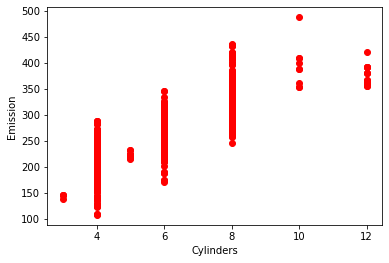

In [8]:
# escribe tu código aquí
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Haz doble click __aquí__ para ver la solución.

<!-- Tu respuesta debajo:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Creando el set de datos de entrenamiento y de el prueba
Train/Test Split divide el dataseet en uno de entrenamiento y otro de pruebas, siendo excluyentes. Después de ello, entrenas con el set de entrenamiento y pruebas con el de prueba. 
Esto brinda una evaluación más exacta porque el set de entrenamiento no es parte de un set de datos que se usaron para entrenar datos. Refleja un escenario más real basado en problemas más actuales.

Esto significa que sabemos la salida de cada punto de datos del set, siendo un escenario ideal ! Y como estos datos no se usaron para entrenar el modelo, el modelo no sabe la salida de estos puntos de datos. Asi que, básicamente, es una real prueba fuera de muestra.



In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regresión Simple
La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, ..., Bn) para minimizar la 'suma residual de cuadrados' entre la x independiente del dataset y la dependiente y por la aproximación lineal.

#### Entrenar distribución de los datos

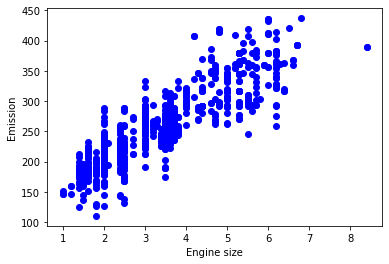

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Usando el paquete sklearn para modelar datos.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.6835467]]
Intercept:  [127.14868351]


Como se mencionó antes, As mentioned before, __Coeficiente__ e __Intercepción__ en la regresión lineal simple, son los parámetros de la recta de ajuste. 
Dado que es una regresión lineal simple, con 2 parámetros solamente, y sabiendo que los parámetros son la intersección y pendiente de la linea, sklearn puede estimarlas directamente a partir de los datos. 
Tener en cuenta que todos los datos deben estar disponibles para poder calcular los parámetros.


#### Trazar las salidas

podemos marcar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

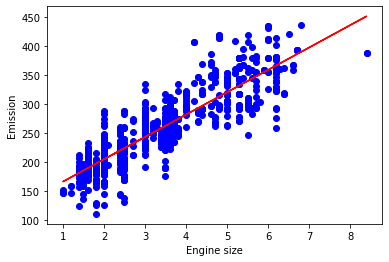

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación
comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee conocimiento profundo en areas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba: 
    - Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
    - Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
    - Error Cuadrático Medio (RMSE).
    - R-cuadrática no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0 y puede tomar valores negativos (porque el modelo puede ser arbitrariamente peor).


In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 23.58
Suma residual de los cuadrados (MSE): 956.52
R2-score: 0.63


## ¿Deseas aprender más?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Laboratorio creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC).  Este lab y su código fuente fueron registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​